# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2023

## Project 2 - Random Maze
Due Friday, March 3

### Description

In this project, you will write a computer code to generate a random maze using a recursive algorithm. You will also write a code to find a path between two points in a given maze.

The integer `n` specifies the size of the `n`-by-`n` array of cells in the maze. Note the matrix indices `i,j` specify the $x$ and $y$-coordinates, respectively (see plot below).

The horizontal and the vertical *interior* walls of the maze are described by the arrays:

- `H`, Bool array of size `n`-by-`n-1`
- `V`, Bool array of size `n-1`-by-`n`

These arrays specify if there is a wall or not between two neighboring cells.

An example is given below, with $n=6$:

In [1]:
H = Bool[0 1 0 0 0; 1 0 1 0 0; 0 1 1 0 0; 1 1 1 0 1; 0 1 0 1 1; 1 0 0 0 0];
V = Bool[1 0 1 1 1 0; 0 1 0 0 1 1; 0 0 0 0 1 0; 0 1 0 1 0 0; 0 0 1 0 1 0];

and the following helper functions can be used to plot the maze:

In [2]:
using PyPlot, Random

function plot_maze(H,V)
    clf()
    axis("off")
    axis("equal")
    n = size(H,1)
    plot([0,n,n,0,0], [0,0,n,n,0], color="k")
    
    for x = 1:n-1, y = 1:n
        if V[x,y]
            plot([x,x], [y-1,y], color="k")
        end
    end
    for x = 1:n, y = 1:n-1
        if H[x,y]
            plot([x-1,x], [y,y], color="k")
        end
    end
end

function plot_cell_indices(n)
    for i = 1:n
        for j = 1:n
            text(i-0.5, j-0.5, "($i,$j)",
                horizontalalignment="center",
                verticalalignment="center",
                fontsize=8)
        end
    end
end

plot_cell_indices (generic function with 1 method)

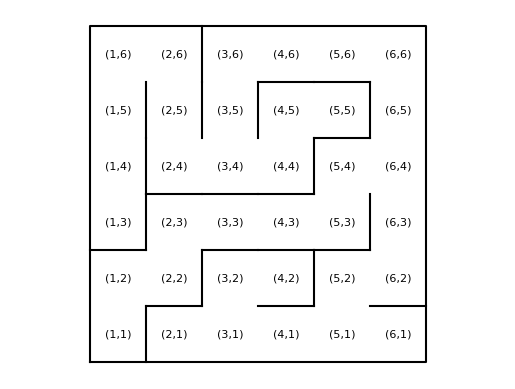

In [3]:
plot_maze(H,V)
plot_cell_indices(size(H,1))

In addition, we will find paths between the points `1,n` and `n,1`, which can be stored in two arrays of integers. For the example above, this path is given by

In [4]:
x = [6, 5, 5, 6, 6, 6, 6, 6, 5, 4, 3, 3, 3, 2, 2, 2, 1];
y = [1, 1, 2, 2, 3, 4, 5, 6, 6, 6, 6, 5, 4, 4, 5, 6, 6];

and it can be plotted along with the maze using the commands:

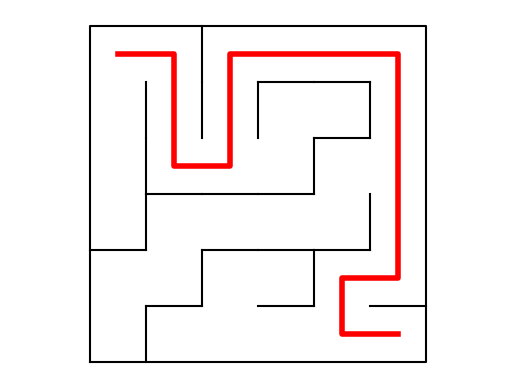

In [5]:
plot_maze(H,V);
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);

### Problem 1 - Generate random maze

Write a function with the syntax

```julia
H,V = make_maze(n)
```

which produces a random maze of size `n`-by-`n` using the following algorithm:

1. Initialize `H` and `V` to matrices of `trues` (that is, assume all cells have walls on all sides)
2. Also initialize an array `visit` to a matrix of `falses`, to keep track of cells that have been visited
3. Create a function `dig(x,y)` which loops over the four directions (Right, Left, Up, Down) in a random order. For each direction, if the neighbor cell is valid and not visited, remove the corresponding wall from `H` or `V` and run the `dig` function recursively on the neighbor cell.
4. Call `dig(1,1)` and return `H,V`

In [6]:
function make_maze(n)
    H = trues(n, n - 1)
    V = trues(n - 1, n)
    visit = falses(n,n)
    visit[1,1] = true
    
    function dig(x,y)
        checkx = [true; visit[x, :]; true]
        checky = [true; visit[:, y]; true]  
        s = []
        
        if checkx[y] == false || checkx[y + 2] == false || checky[x] == false || checky[x + 2] == false
            if checkx[y] == false
                push!(s, 1)
            end
            
            if checkx[y + 2] == false 
                push!(s, 2)
            end
            
            if checky[x] == false 
                push!(s, 4)
            end
            
            if checky[x + 2] == false
                push!(s, 3)
            end
    
            v = []
            while true
                r = rand(s)
                if !(r ∈ v)
                    push!(v, r)
                end
                if length(v) == length(s)
                    break
                end
            end

            for d in v 
                if d == 1 && visit[x, y - 1] == false                     #left
                    V[y - 1, n - x + 1], visit[x, y - 1] = false, true
                elseif d == 2 && visit[x, y + 1] == false                 #right
                    V[y, n - x + 1], visit[x, y + 1] = false, true
                elseif d == 3 && visit[x + 1, y] == false                 #down
                    H[y, n - x], visit[x + 1, y] = false, true
                elseif d == 4 && visit[x - 1, y] == false                 #up
                    H[y, n - x + 1], visit[x - 1, y] = false, true
                end
            
                if d == 1 && visit[x, y - 1] == true
                    y -= 1
                    dig(x,y)
                elseif d == 2 && visit[x, y + 1] == true
                    y += 1
                    dig(x,y)
                elseif d == 3 && visit[x + 1, y] == true
                    x += 1
                    dig(x,y) 
                elseif d == 4 && visit[x - 1, y] == true
                    x -= 1
                    dig(x,y)
                end
            end
        end
    end
    dig(1,1)
    H, V, visit
end 

make_maze (generic function with 1 method)

### Problem 2 - Find path from `1,n` to `n,1`

Next, write a function with the syntax

```julia
pathx, pathy = find_path(H,V)
```

which finds a path in the maze `H,V` between the coordinates `1,n` and `n,1` using the following algorithm:

1. Again create an array `visit` to keep track of visited cells
2. Also initialize empty vectors `pathx,pathy` to store the final path
3. Create a recursive function `recur(x,y)` which performs the following:
   1. If the position `x==n` and `y==1` is found, insert these values into `pathx,pathy` and return `true`
   2. Otherwise, consider each neighbor of `x,y`. If the cell is valid, the maze has no wall in that direction, and the cell has not been visited, apply `recur` to the neighbor cell.
   3. If any of the calls to `recur` returns `true`, insert `x,y` into `pathx,pathy` and return `true`
4. Call `recur(1,n)` and return `pathx,path`

In [7]:
function find_path(H,V)
    n = size(H, 1)
    visit = falses(n,n)
    pathx = []
    pathy = []
    
    function recur(x,y)
        checkx = [true; visit[x, :]; true]
        checky = [true; visit[:, y]; true]
        
        if x == n && y == n
            push!(pathx, x)
            push!(pathy, y)
            return true
        elseif checkx[y] == false || checkx[y + 2] == false || checky[x] == false || checky[x + 2] == false
            v = []
            if checkx[y] == false 
                if V[y - 1, n - x + 1] == false
                    push!(v, 1)
                end
            end
            
            if checkx[y + 2] == false 
                if V[y, n - x + 1] == false
                    push!(v, 2)
                end
            end
            
            if checky[x + 2] == false 
                if H[y, n - x] == false
                    push!(v, 3)
                end
            end
            
            if checky[x] == false 
                if H[y, n - x + 1] == false
                    push!(v, 4)
                end
            end
            
            for d in v
                if d == 1 && visit[x, y - 1] == false                         #left
                    visit[x, y - 1] = true
                    if recur(x, y - 1) == true
                        push!(pathx, x)
                        push!(pathy, y)
                        return true
                    end
                end
                if d == 2 && visit[x, y + 1] == false                         #right
                    visit[x, y + 1] = true
                    if recur(x, y + 1) == true
                        push!(pathx, x)
                        push!(pathy, y)
                        return true
                    end
                end
                if d == 3 && visit[x + 1, y] == false                         #down
                    visit[x + 1, y] = true
                    if recur(x + 1, y) == true
                        push!(pathx, x)
                        push!(pathy, y)
                        return true
                    end
                end
                if d == 4 && visit[x - 1, y] == false                         #up
                    visit[x - 1, y] = true
                    if recur(x - 1, y) == true
                        push!(pathx, x)
                        push!(pathy, y)
                        return true
                    end
                end
            end
        end
    end
    recur(1,1)
    pathx, pathy
end

find_path (generic function with 1 method)

### Problem 3 - Large maze test

Finally, run the code below to illustrate your codes.

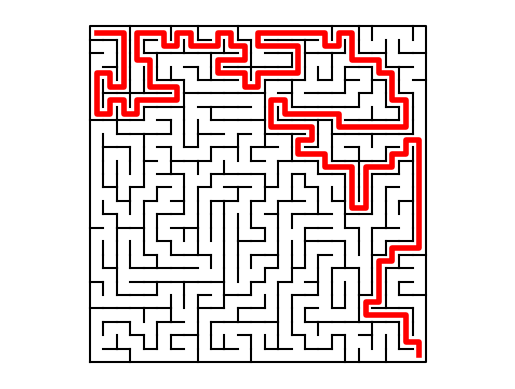

In [8]:
n = 25
H,V = make_maze(n) 
plot_maze(H,V)
x, y = find_path(H,V)
plot(y .- 0.5,-x .+ 0.5 .+ n, color="r", linewidth=4);